# Infer Experiment

analyze infer experiment

In [1]:
# %load ../start.py
# Load useful extensions

# Activate the autoreload extension for easy reloading of external packages
%reload_ext autoreload
%autoreload 2

# Set up cashdir
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Trun on the water mark
%reload_ext watermark
%watermark -u -d -v

# Load ipycache extension
%reload_ext ipycache
from ipycache import CacheMagics
CacheMagics.cachedir = '../cachedir'

# Add project library to path
import sys
sys.path.insert(0, '../../lib/python')

# The usual suspects
import os
import numpy as np
import pandas as pd

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('poster')

# Turn off scientific notation
np.set_printoptions(precision=5, suppress=True)

last updated: 2017-03-08 

CPython 3.5.2
IPython 5.3.0


In [5]:
from ncbi_remap.parser import parse_files, parse_inferExperiment

In [6]:
# Get a list of all files
flist = []
for root, dirs, files in os.walk('../../output/prealignment/raw'):
    for file in files:
        flist.append(os.path.join(root, file))

In [7]:
infer = parse_files(flist, '../../output/prealignment/raw/{experiment}/{sample}/{sample}.infer_experiment.txt', parse_inferExperiment)

In [9]:
infer

,"Fraction of reads explained by ""++,--""","Fraction of reads explained by ""+-,-+""","Fraction of reads explained by ""1++,1--,2+-,2-+""","Fraction of reads explained by ""1+-,1-+,2++,2--""",Fraction of reads failed to determine
SRR1505834,0.4864,0.4818,NaN,NaN,0.0318
SRR031749,0.5285,0.4420,NaN,NaN,0.0295
SRR031748,0.5260,0.4436,NaN,NaN,0.0304
SRR1543709,0.0298,0.9196,NaN,NaN,0.0506
ERR650000,0.4988,0.4489,NaN,NaN,0.0523
SRR1515110,0.4608,0.4660,NaN,NaN,0.0733
ERR393884,0.4664,0.4860,NaN,NaN,0.0476
ERR394404,0.4666,0.4865,NaN,NaN,0.0470
ERR393271,0.4667,0.4859,NaN,NaN,0.0474
ERR392550,0.4655,0.4859,NaN,NaN,0.0486


In [10]:
infer.columns

Index(['Fraction of reads explained by "++,--"',
       'Fraction of reads explained by "+-,-+"',
       'Fraction of reads explained by "1++,1--,2+-,2-+"',
       'Fraction of reads explained by "1+-,1-+,2++,2--"',
       'Fraction of reads failed to determine'],
      dtype='object')

In [19]:
se = infer[~infer['Fraction of reads explained by "++,--"'].isnull()].copy()
se.dropna(axis=1, how='all', inplace=True)
pe = infer[infer['Fraction of reads explained by "++,--"'].isnull()].copy()
pe.dropna(axis=1, how='all', inplace=True)

In [32]:
se.columns

Index(['Fraction of reads explained by "++,--"',
       'Fraction of reads explained by "+-,-+"',
       'Fraction of reads failed to determine'],
      dtype='object')

In [37]:
se.sort_values(by=['Fraction of reads explained by "++,--"', 'Fraction of reads failed to determine'], inplace=True)

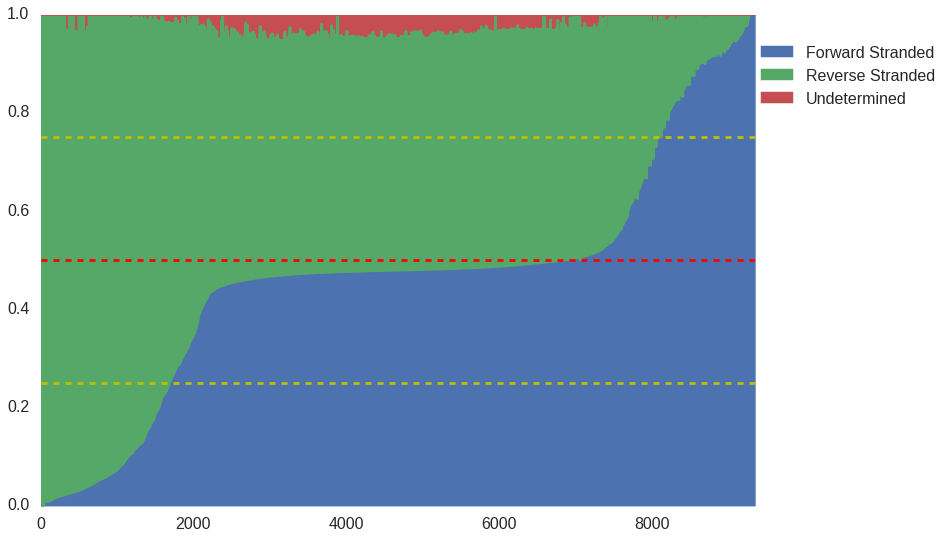

In [52]:
ax = se.plot.area(use_index=False, legend=True)
h, l = ax.get_legend_handles_labels()
_ = ax.legend(h, ['Forward Stranded', 'Reverse Stranded', 'Undetermined'], loc=(1, .8))
_ = ax.set_ylim(0, 1)
_ = ax.axhline(0.5, ls='--', color='r')
_ = ax.axhline(0.25, ls='--', color='y')
_ = ax.axhline(0.75, ls='--', color='y')


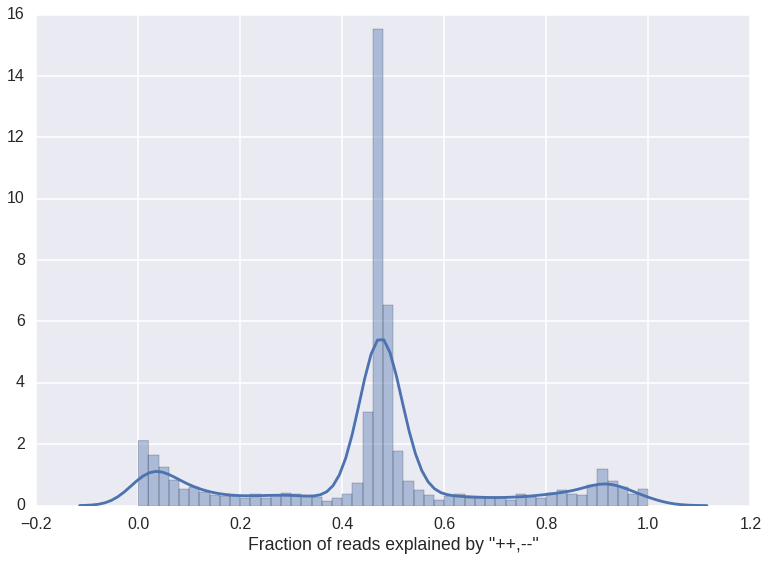

In [53]:
sns.distplot(se.iloc[:, 0], hist=True)

In [2]:
from pymongo import MongoClient

In [7]:
client = MongoClient(host='localhost', port=27022)

In [8]:
db = client['sra2']

In [9]:
remap = db['remap']
ncbi = db['ncbi']

In [143]:
oliver = remap.aggregate([
    {'$match': {'$and': [{'contacts.last_name': 'Oliver'}, {'contacts.first_name': 'Brian'}]}},
    {'$unwind': '$runs'},
    {'$project': {'srx': '$srx', '_id': 0, 'srr': '$runs.srr'}}
])

oliverDf = pd.DataFrame(list(oliver))
print(oliverDf.shape)
oliverDf.head()

(4230, 2)


,srr,srx
0,SRR1949973,SRX976326
1,SRR1949972,SRX976325
2,SRR1949971,SRX976324
3,SRR1949970,SRX976323
4,SRR1949969,SRX976322


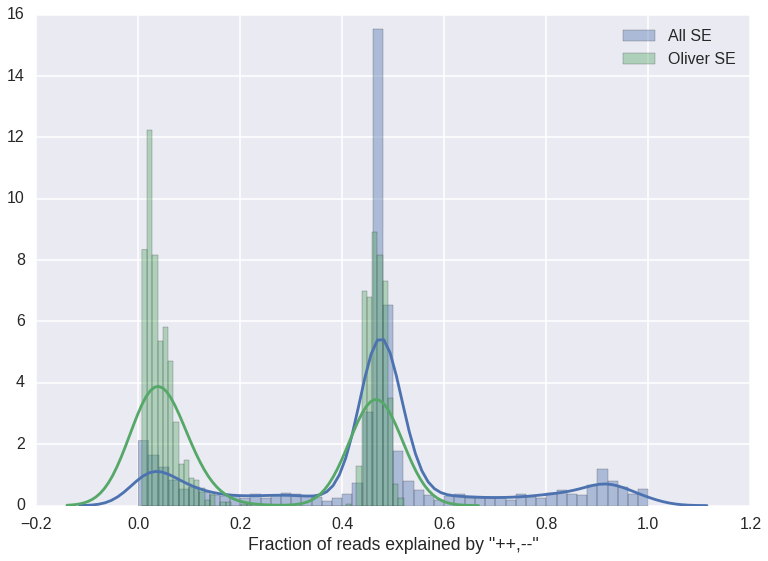

In [154]:
oliverRuns = oliverDf.srr.values.tolist()
oliverSE = se[se.index.isin(oliverRuns)]

ax = sns.distplot(se.iloc[:, 0], hist=True, bins=50, label='All SE')
_ = sns.distplot(oliverSE.iloc[:, 0], hist=True, bins=50, label='Oliver SE')
_ = ax.legend()

In [35]:
samples = remap.aggregate([
    {'$match': {
        'runs.srr': {'$exists': 1}, 
        '$or': [
            {'runs.pre_aln_flags': {'$exists': 0}},
            {'runs.pre_aln_flags': {'$eq': []}},
        ]
    }},
    {'$unwind': '$runs'},
    {'$project': {'_id': 0, 'experiment': '$srx', 'sample': '$runs.srr'}}
])
sample_table = pd.DataFrame(list(samples))

In [36]:
sample_table.shape

(1493, 2)

In [30]:
remap.find_one_and_update({'runs.srr': 'SRR5234249'}, {'$': {'runs.$.pre_aln_flags': 1}})

{'_id': 'SRX2541775',
 'bioproject': 'PRJNA344692',
 'contacts': [{'email': 'mchamber0@g.ucla.edu',
   'first_name': 'Michael',
   'last_name': 'Chambers'}],
 'papers': [],
 'runs': [{'srr': 'SRR5234249'}],
 'sample': {'biosample': 'SAMN05860274', 'srs': 'SRS1960966'},
 'sra': 'SRA535937',
 'srp': 'SRP098947'}